# 21 kmeans

## 계층적 군집
* 군집트리, 텡드로그램을 생성하여 다양한 데이터를 그룹화
* 비슷한 군집끼리 묶어가며 최종적으로 하나의 군집단으로 묶는 기법
* 즉, 군집간의 거리를 기반으로 군집화하는 방식으로  
  기존의 군집기법(kmeans)에 비해 군집수를 지정할 필요X
* 계층적 군집의 종류는 응집형, 분리형
    + 응집형 : 개별데이터 군집 => 군집단 형성
    + 분리형 : 데이터 전체를 하나의 군집 => 세부적으로 여러 군집으로 나눔

<img src='img/dendrogram.png'>

## mglearn 패키지
* "파이썬 라이브러리를 활용한 머신러닝"의 저자가 교육용으로 만든 패키지

In [1]:
# pip --trusted-host pypi.org --trusted-host files.pythonhosted.org install mglearn

In [2]:
import mglearn

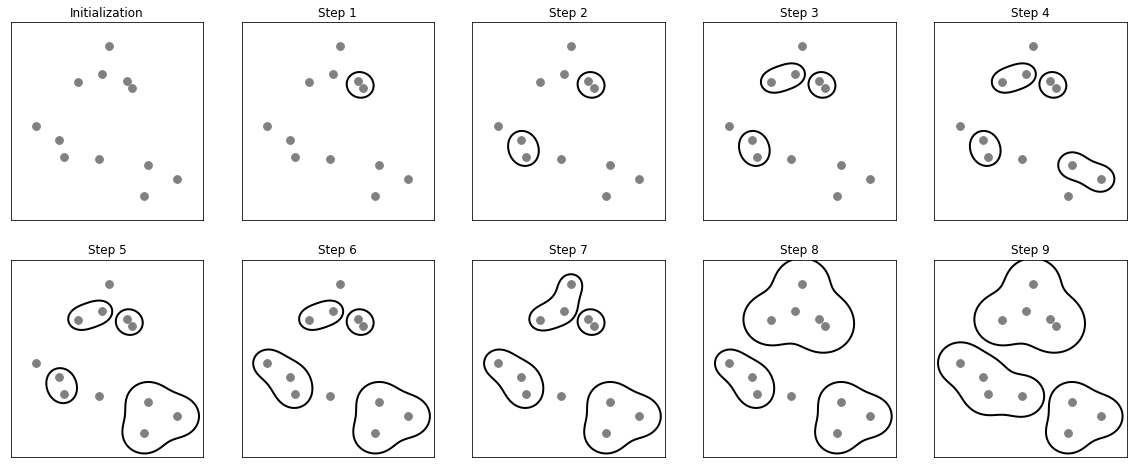

In [3]:
mglearn.plots.plot_agglomerative_algorithm()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster

In [6]:
from sklearn.metrics import silhouette_score

## 덴드로그램 시각화

In [7]:
X = np.array([ [5,3], [10,5], [15,12],
               [24,10], [30,30], [85,70],
               [71,80], [60,78], [70,55],
               [80,91] ])

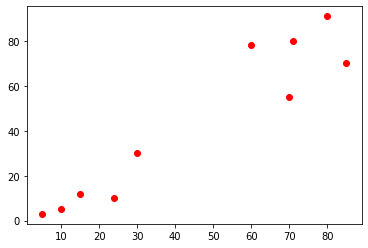

In [8]:
plt.plot(X[:,0], X[:,1], 'ro')

## 덴드로그램 작동원리
* linkage 함수의 method 속성으로 각 군집간의 연결방식을 지정  
  => single/average/complete/centeroid/ward
* 단일single　&nbsp;&nbsp;&nbsp;&nbsp;: 각 군집을 대상으로 최소거리 기준 (가까운것부터 군집)
* 평균average　&nbsp;: 각 군집을 대상으로 평균거리 기준
* 최대complete  &nbsp;: 각 군집을 대상으로 최대거리 기준 (먼것부터 군집)
* 중심centeroid &nbsp;: 각 군집내 중심점 기준
* 와드ward　　&nbsp;&nbsp;: 군집간 SSW(응집도), SSB(분리도)간의 차이를 이용

<img src='img/linkage.png' width='90%'>

In [9]:
# linkage(객체, method=거리계산법)
linked = linkage(X, method='ward')

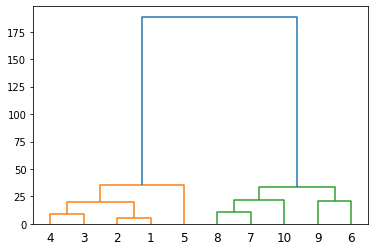

In [10]:
# orientation : 덴드로그램 그래프 출력 방향
# distance_sort : 군집간 거리 출력순서
# show_leaf_counts : 군집 가지수 출력
dendrogram(linked, orientation='top', 
           labels=range(1,11),
           distance_sort='descending', 
           show_leaf_counts=True)
plt.show()

## 군집을 나눌 때 적절한 distance는?
* 덴드로그램을 보고 n개의 군집을 나눌려고 할 때 적절한 y축값은?
* 덴드로그램에서는 밑에서 위로 올라갈 수록  
  군집을 의미하는 선의 갯수가 줄어듬(응집형 군집)
* scipy에서는 fcluster함수를 이용해서 dictance가 특정값을 때 군집 정보를 알려줌

In [11]:
# fcluster(연결방식, 거리, 거리측정방식)
clusters = fcluster(linked, 20, criterion='distance')
clusters

array([5, 5, 5, 5, 6, 1, 3, 3, 2, 4], dtype=int32)

In [12]:
nc = np.unique(clusters)
np.count_nonzero(nc)

6

In [13]:
# 만일, 군집간 거리를 30으로 하면 군집의 갯수는 몇개인가?
clusters = fcluster(linked, 30, criterion='distance')
clusters

array([3, 3, 3, 3, 4, 1, 2, 2, 1, 2], dtype=int32)

In [14]:
nc = np.unique(clusters)
np.count_nonzero(nc)

4

## sklearn으로 응집형 군집 실시
* AgglimerativeClustering 패키지 사용

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
cluster = AgglomerativeClustering(n_clusters=2,
                                  affinity='euclidean',
                                  linkage='ward')
cluster.fit_predict(X)
cluster.labels_

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

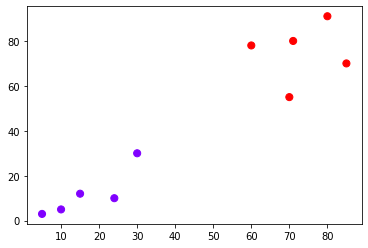

In [17]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, s=50, cmap='rainbow')

## iris 데이터 셋을 응집형 군집으로 나눠봄 1
* 군집간 연결방식 : average, ward
* 각 개별적으로 덴드로그램 시각화

In [18]:
from sklearn.datasets import load_iris

In [19]:
iris = load_iris()

In [20]:
X = iris.data
y = iris.target

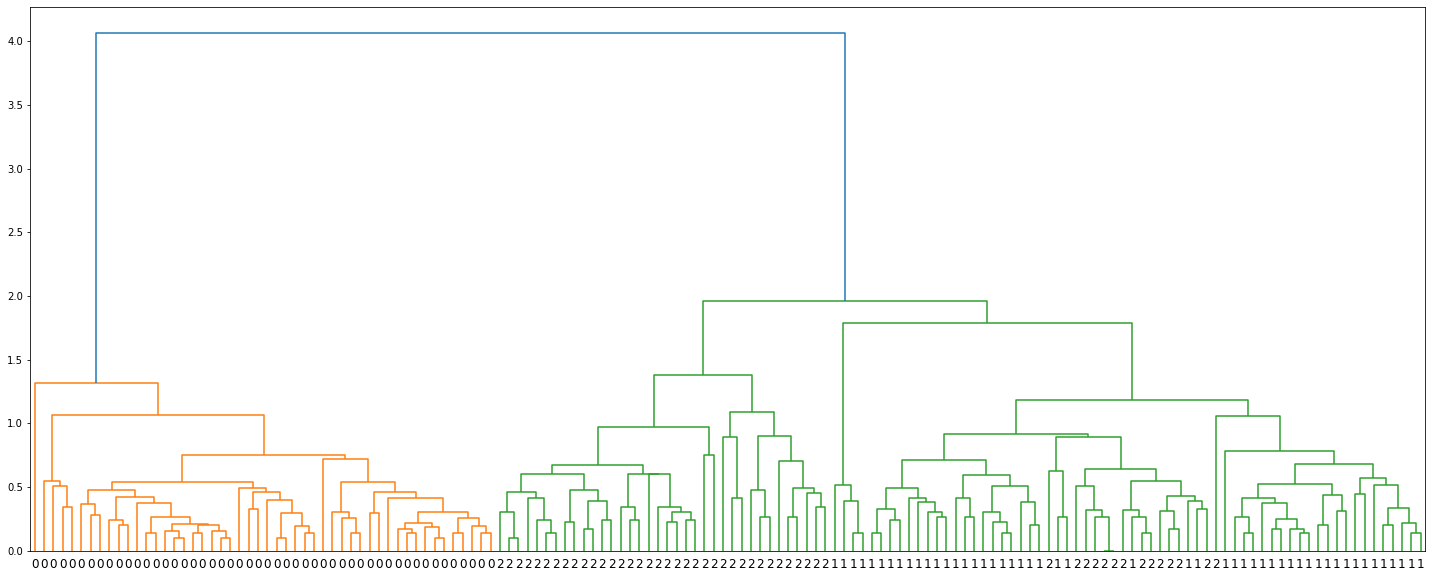

In [21]:
# 응집형 군집 1
linked = linkage(X, method='average')

plt.figure(figsize=(25,10))
dendrogram(linked, labels=y,
           leaf_rotation=0,
           leaf_font_size=12)
plt.show()

In [22]:
# 3개의 군집으로 나눌 때 적절한 distance는?
fcluster(linked, 1.8, criterion='distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

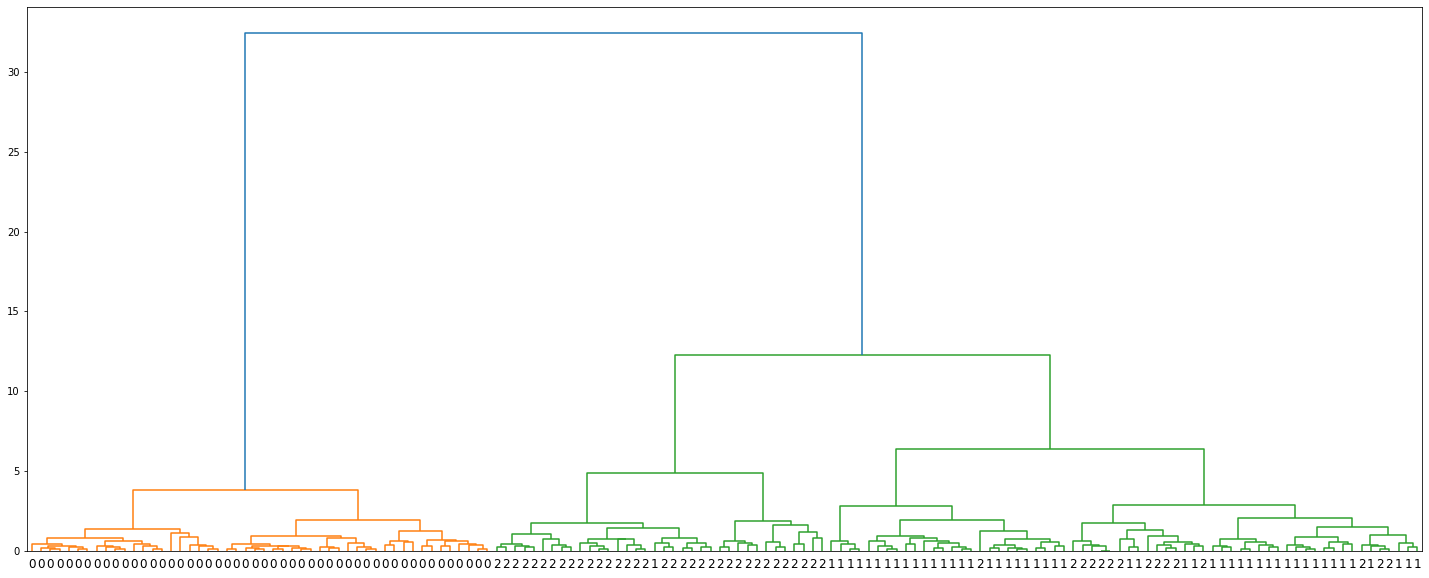

In [23]:
# 응집형 군집 1
linked = linkage(X, method='ward')

plt.figure(figsize=(25,10))
dendrogram(linked, labels=y,
           leaf_rotation=0,
           leaf_font_size=12)
plt.show()

In [24]:
# 3개의 군집으로 나눌 때 적절한 distance는?
fcluster(linked, 10, criterion='distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

## iris 데이터 셋을 응집형 군집으로 나눠봄 2

In [25]:
# average
clusters = AgglomerativeClustering(n_clusters=3, 
                                   affinity='euclidean', 
                                   linkage='average')
clusters.fit_predict(X)
clusters.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [26]:
silhouette_score(X, clusters.labels_)

0.5541608580282851

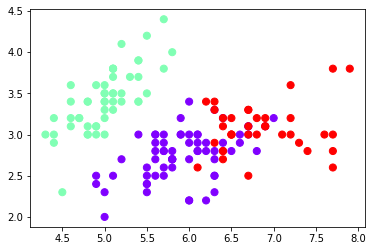

In [27]:
plt.scatter(X[:,0],X[:,1], c=clusters.labels_, s=50, cmap='rainbow')

In [28]:
# ward
clusters = AgglomerativeClustering(n_clusters=3, 
                                   affinity='euclidean', 
                                   linkage='ward')
clusters.fit_predict(X)
clusters.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## 실루엣 그래프로 적절한 군집수 확인

In [29]:
from sklearn.datasets import make_blobs

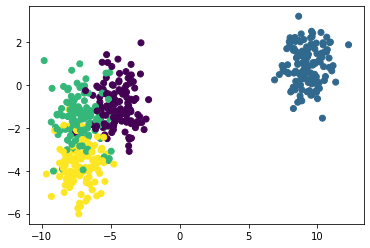

In [30]:
X, y = make_blobs(n_samples=500, n_features=2,
                  centers=4, cluster_std=1,
                  random_state=2111161155)

plt.scatter(X[:,0], X[:,1], c=y)

In [31]:
# 클러스터 갯수를 2~4일 때 실루엣계수를 시각화
import mldlpy3

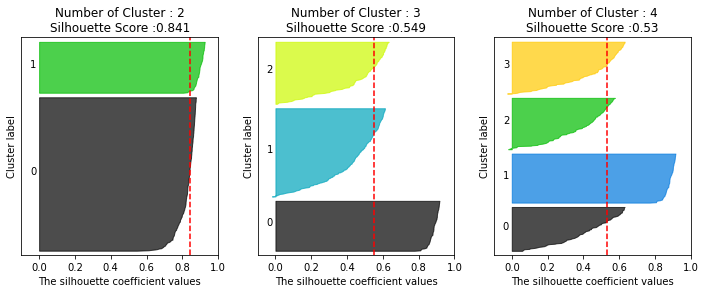

In [32]:
# visualize_silhoette(군집수, 대상객체)
mldlpy3.visualize_silhouette([2,3,4], X)

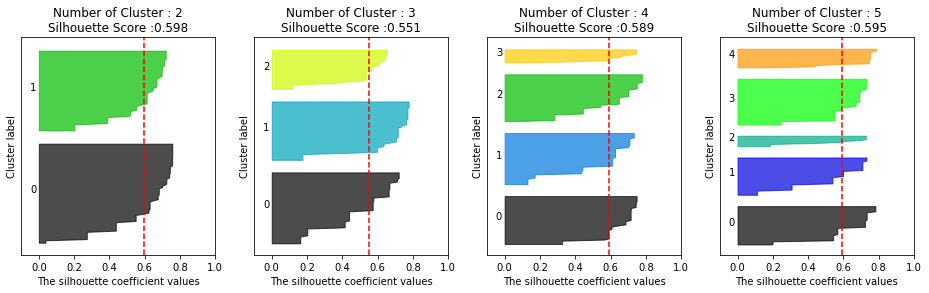

In [33]:
# iris 데이터를 기준으로 클러스터 갯수를 2~5일 때 실루엣계수를 시각화
# sepal width/length
mldlpy3.visualize_silhouette([2,3,4,5], iris.data[:,:1])

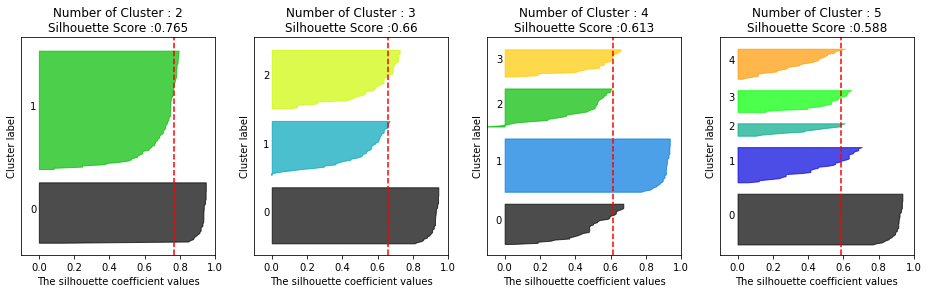

In [34]:
mldlpy3.visualize_silhouette([2,3,4,5], iris.data[:,2:])

In [35]:
# 학생성적과 집중도를 기준으로 클래스를 나눌려고 할 때 몇개의 반으로
# 나누는 것이 좋을지 텐드로그램으로 시각화해보세요 (연결방식 : average)
ac = pd.read_csv('academy.csv', encoding='euc-kr')
ac.head()

,학생번호,국어점수평균,수학점수평균,영어점수평균,과학점수평균,학업집중도
0,1,90,75,85,60,70
1,2,65,90,60,88,80
2,3,45,53,48,50,60
3,4,77,96,62,92,70
4,5,88,89,80,82,90


In [36]:
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   학생번호    52 non-null     int64
 1   국어점수평균  52 non-null     int64
 2   수학점수평균  52 non-null     int64
 3   영어점수평균  52 non-null     int64
 4   과학점수평균  52 non-null     int64
 5   학업집중도   52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [37]:
X = ac.iloc[:, 1:]

In [38]:
linked = linkage(X, method='average')
linked[:5]

array([[30.        , 51.        ,  4.12310563,  2.        ],
       [37.        , 41.        ,  4.79583152,  2.        ],
       [18.        , 19.        ,  7.        ,  2.        ],
       [23.        , 47.        ,  7.07106781,  2.        ],
       [ 0.        , 14.        ,  7.28010989,  2.        ]])

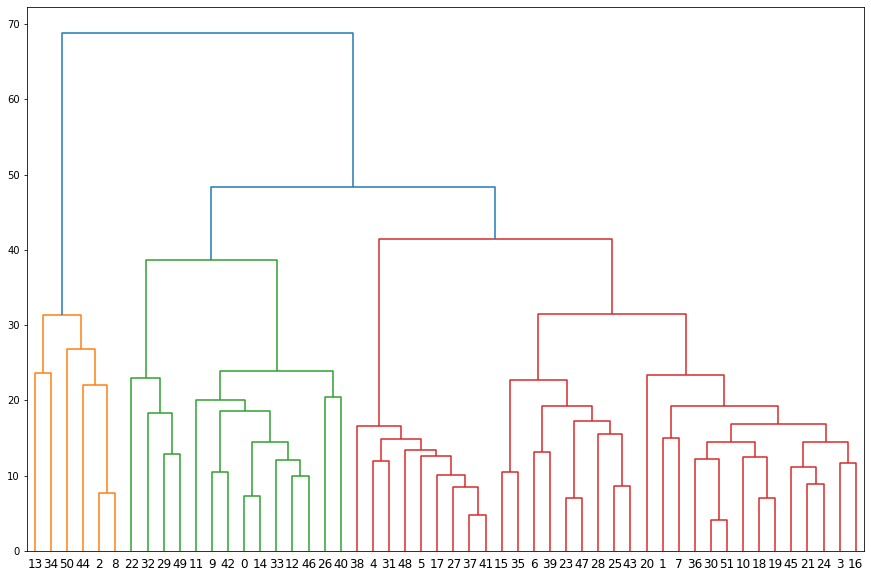

In [39]:
plt.figure(figsize=(15,10))
dendrogram(linked, leaf_rotation=0, leaf_font_size=12)
plt.show()

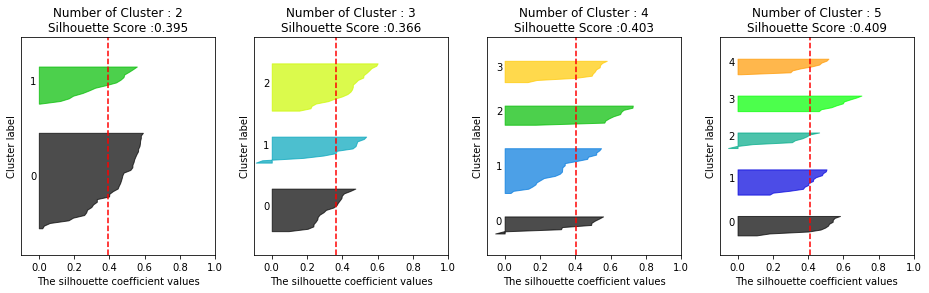

In [40]:
# 군집갯수별 실루엣계수 확인
mldlpy3.visualize_silhouette([2,3,4,5], X)

In [41]:
cluster = AgglomerativeClustering(n_clusters=3, 
                                  affinity='euclidean', 
                                  linkage='average')
cluster.fit_predict(X)

array([2, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 0, 2, 1, 0])

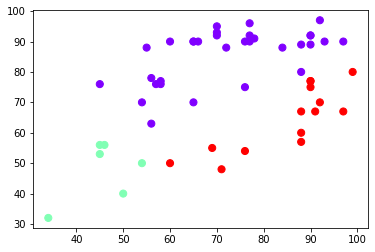

In [42]:
plt.scatter(X.iloc[:,0], X.iloc[:,1],
            c=cluster.labels_, s=50, cmap='rainbow')

In [43]:
cluster = AgglomerativeClustering(n_clusters=4, 
                                  affinity='euclidean', 
                                  linkage='average')
cluster.fit_predict(X)

array([0, 2, 1, 2, 3, 3, 2, 2, 1, 0, 2, 0, 0, 1, 0, 2, 2, 3, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 3, 2, 0, 2, 3, 0, 0, 1, 2, 2, 3, 3, 2, 0, 3, 0, 2,
       1, 2, 0, 2, 3, 0, 1, 2])

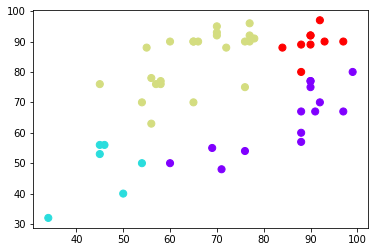

In [44]:
plt.scatter(X.iloc[:,0], X.iloc[:,1],
            c=cluster.labels_, s=50, cmap='rainbow')

In [45]:
cluster = AgglomerativeClustering(n_clusters=5, 
                                  affinity='euclidean', 
                                  linkage='average')
cluster.fit_predict(X)

array([2, 0, 1, 0, 3, 3, 0, 0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 3, 0, 0, 0, 0,
       4, 0, 0, 0, 2, 3, 0, 4, 0, 3, 4, 2, 1, 0, 0, 3, 3, 0, 2, 3, 2, 0,
       1, 0, 2, 0, 3, 4, 1, 0])

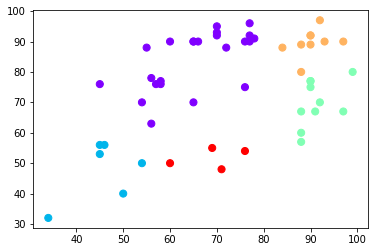

In [46]:
plt.scatter(X.iloc[:,0], X.iloc[:,1],
            c=cluster.labels_, s=50, cmap='rainbow')
# 응집형으로 나누는 경우 실루엣 계수가 높은 군집수는 5개가 적당

### ggplot2에서 제공하는 다이아몬드 데이터셋을 이용해서 군집분석 실시
* 가격, 캐럿수, 깊이, 테이블만 추출해서 군집 수행

In [47]:
dia = pd.read_csv('diamond.csv')
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [48]:
# dia = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/diamonds.csv',index_col=0)

In [49]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [50]:
d = dia.iloc[:, [6,0,4,5]]
d

,price,carat,depth,table
0,326,0.23,61.5,55.0
1,326,0.21,59.8,61.0
2,327,0.23,56.9,65.0
3,334,0.29,62.4,58.0
4,335,0.31,63.3,58.0
...,...,...,...,...
53935,2757,0.72,60.8,57.0
53936,2757,0.72,63.1,55.0
53937,2757,0.70,62.8,60.0
53938,2757,0.86,61.0,58.0


In [51]:
# 기존 분류(군집) 결과
dia.cut.value_counts()   # cut으로 분류 : 5가지

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [52]:
dia.color.value_counts()   # color로 분류 : 7가지

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [53]:
dia.clarity.value_counts()   # clarity으로 분류 : 8가지

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [54]:
from sklearn.cluster import KMeans

In [62]:
# 최적의 군집수 알아보기
sss = []
els = []
for k in range(4, 10+1):
    kms = KMeans(n_clusters=k, max_iter=1000, random_state=2111161445)
    kms.fit(d)
    ss = silhouette_score(d, kms.labels_, metric='euclidean')
    sss.append(ss)
    els.append(kms.inertia_)

In [ ]:
plt.plot(range(4,10+1), sss, 'ro-')

In [ ]:
plt.plot(range(4,10+1), els, 'ro-')

In [ ]:
# 군집이 5개일 때
kms = KMeans(n_clusters=5, max_iter=1000, random_state=2111161445)
kms.fit(d)

In [ ]:
# 시각화 : 가격, 캐럿수, 깊이, 테이블
c = ['red','blue','green','pink','navy']
for i in range(5):
    plt.scatter(d.iloc[kms.labels_ == i,0], 
                d.iloc[kms.labels_ == i,1], 
                c=c[i], s=50, marker='o')

In [ ]:
c = ['red','blue','green','pink','navy']
for i in range(5):
    plt.scatter(d.iloc[kms.labels_ == i,0], 
                d.iloc[kms.labels_ == i,2], 
                c=c[i], s=50, marker='o')

In [ ]:
# 군집이 6개일 때
kms = KMeans(n_clusters=6, max_iter=1000, random_state=2111161445)
kms.fit(d)

In [ ]:
# 시각화 : 가격, 캐럿수, 깊이, 테이블
c = ['red','blue','green','pink','navy','yellow']
for i in range(6):
    plt.scatter(d.iloc[kms.labels_ == i,0], 
                d.iloc[kms.labels_ == i,2], 
                c=c[i], s=50, marker='o')

In [ ]:
# 군집이 7개일 때
kms = KMeans(n_clusters=7, max_iter=1000, random_state=2111161445)
kms.fit(d)

In [ ]:
# 시각화 : 가격, 캐럿수, 깊이, 테이블
c = ['red','blue','green','pink','navy','purple','yellow']
for i in range(7):
    plt.scatter(d.iloc[kms.labels_ == i,0], 
                d.iloc[kms.labels_ == i,2], 
                c=c[i], s=50, marker='o')

## 응집형 군집

In [ ]:
linked = linkage(d, method='average')
dendrogram(linked, leaf_rotation=0, leaf_font_size=12)
# 메모리 부족 -> 시각화 실패

In [ ]:
# 군집갯수별 실루엣계수 확인
mldlpy3.visualize_silhouette([4,5,6,7,8,9,10], d)